# Country Preperation<br>

## Purpose
Takes in the .csv files for every country, which were created in the previous notebook and extracts the relevant information from them and places it into a dataframe

## Datasets
* .csv files from the world bank fro every competing country
* Physical geography data on a lagre number of the countries

Imports necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from glob import glob

Loads all csv files in "Country Data" folder into a list of dataframes

In [2]:
dfs = [pd.read_csv(dataset, skiprows=3) for dataset in glob('../../data/raw/Country_Data/*.csv')]
len(dfs)

199

In [3]:
Years = [year for year in range(1960,2017)]

getInfo function takes in rows from each of the country pertaining to population, male population, female population, GDP and finally Employment it then takes in the values from each of these rows for each of the olympic years. The results of the function are stored in the countryDict dictionary

In [4]:
countryDict = dict()
def getInfo(row,rowM,rowF,rowLF,rowGDP,rowEMP):
    popDict = dict()
    for year in Years:
        popDict[year] = [row[str(year)],rowM[str(year)],rowF[str(year)],rowLF[str(year)],rowGDP[str(year)],rowEMP[str(year)]]
        countryDict[row["Country Name"]] = popDict

Goes through each of the countries dataframes and passes the appropriate rows to the getInfo function

In [5]:
for df in dfs:
    ##Uses appropriate indicator codes to obtain wanted information
    row = df[df['Indicator Code'] == 'SP.POP.TOTL'].iloc[0]
    rowM = df[df['Indicator Code'] == 'SP.POP.TOTL.MA.IN'].iloc[0]
    rowF = df[df['Indicator Code'] == 'SP.POP.TOTL.FE.IN'].iloc[0]
    rowLF = df[df['Indicator Code'] == 'SP.DYN.LE00.IN'].iloc[0]
    rowGDP = df[df['Indicator Code'] == 'NY.GDP.MKTP.KD'].iloc[0]
    rowEMP = df[df['Indicator Code'] == 'SL.EMP.TOTL.SP.ZS'].iloc[0]
    getInfo(row,rowM,rowF,rowLF,rowGDP,rowEMP)

country dict is a multidimensional array holding data for every country for every year from 1960 - 2017

In [6]:
countryDict

{'Afghanistan': {1960: [8996351.0,
   4649361.0,
   4346990.0,
   32.337560975609797,
   nan,
   nan],
  1961: [9166764.0, 4729085.0, 4437679.0, 32.786975609756105, nan, nan],
  1962: [9345868.0, 4813500.0, 4532368.0, 33.228926829268303, nan, nan],
  1963: [9533954.0, 4902742.0, 4631212.0, 33.666902439024398, nan, nan],
  1964: [9731361.0, 4996990.0, 4734371.0, 34.1019024390244, nan, nan],
  1965: [9938414.0, 5096399.0, 4842015.0, 34.5349024390244, nan, nan],
  1966: [10152331.0, 5199609.0, 4952722.0, 34.966926829268303, nan, nan],
  1967: [10372630.0, 5306376.0, 5066254.0, 35.398926829268298, nan, nan],
  1968: [10604346.0, 5419182.0, 5185164.0, 35.832414634146296, nan, nan],
  1969: [10854428.0, 5541419.0, 5313009.0, 36.2693902439024, nan, nan],
  1970: [11126123.0, 5674682.0, 5451441.0, 36.712829268292701, nan, nan],
  1971: [11417825.0, 5818118.0, 5599707.0, 37.161756097561003, nan, nan],
  1972: [11721940.0, 5967987.0, 5753953.0, 37.620170731707297, nan, nan],
  1973: [12027822.0,

Lists are created from countryDict 

In [7]:
country = []
year = []
males = []
females = [] 
pop = []
lf =[]
gdp = []
emp = []

for key in countryDict:
    for i in countryDict[key]:
        country.append(key)
        year.append(i)
        pop.append(countryDict[key][i][0])
        males.append(countryDict[key][i][1])
        females.append(countryDict[key][i][2])
        lf.append(countryDict[key][i][3])
        gdp.append(countryDict[key][i][4])

The lists are then added into a dataframe

In [8]:
outputDF = pd.DataFrame(
    {'Country': country,
     'Population': pop,
     'Year':year,
     'Males':males,
     'Females':females,
     'Life_Expectancy': lf,
     'GDP':gdp
    })

The columns of the dataframe are then reordered and the first five rows are outputted

In [9]:
outputDF = outputDF[['Country','Year','Population','Males','Females','Life_Expectancy', 'GDP']]
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN


Below is a plot of the population of 'Afghanistan' this was arbitrarily chosen to check for null population values 

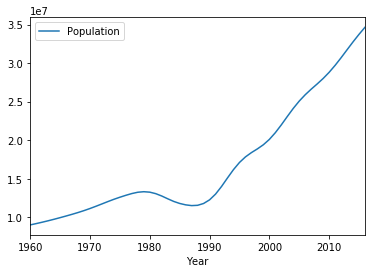

In [10]:
temp = outputDF[outputDF.Country == "Afghanistan"][['Year','Population']]
temp.set_index('Year').sort_index().plot()
plt.show()

The number of nulls present in the dataframe is then outputted to help identify issues 

In [11]:
outputDF.isnull().sum()

Country               0
Year                  0
Population           38
Males               779
Females             779
Life_Expectancy     950
GDP                2977
dtype: int64

# Add Region <br>
To help approximate the nulls we added the region for each of the countries, we used this data which is present in the dictionary.csv file

In [12]:
dictDF = pd.read_csv('../../data/raw/dictionary.csv')
dictDF.head()

,Country,Code,Region
0,Afghanistan,AFG,West and Central Asia
1,Albania,ALB,Europe
2,Algeria,ALG,North Africa
3,American Samoa,ASA,Oceania
4,Andorra,AND,Europe


To add the regions we simply joined the dataframe now containing all teh country data fro each year to the dataframe containing the dictionary.csv file. We joined both o the Country column

In [13]:
outputDF = pd.merge(outputDF, dictDF[['Country','Region']],  how='left', left_on=['Country'], right_on = ['Country'])
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN,West and Central Asia
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN,West and Central Asia
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN,West and Central Asia
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia


Due to disparities in the names some countries were left without regions

In [14]:
outputDF[outputDF.Region.isnull()].Country.unique()

array(['Bahamas, The', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.',
       'Gambia, The', 'Korea, Dem. People’s Rep.', 'Micronesia, Fed. Sts.',
       'Venezuela, RB', 'Virgin Islands (U.S.)'], dtype=object)

The deal with this we manually found the name assocaited with each of these countries in the dictDF dataframe as stored them in a list below

In [15]:
aliases = ['Bahamas', 'Congo, Dem Rep', 'Egypt Arab Rep',
       'Gambia', "Korea, Dem. People's Rep.", 'Micronesia Fed. Sts.',
       'Puerto Rico', 'Venezuela', 'Virgin Islands (US)']

Errors arise due to punctuation being present in some of the country titles this is rectified here

The loop below then filled in the NaN values using the appropriate values from the dictDF dataframe

In [16]:
temp = outputDF[outputDF.Region.isnull()]
count= 0 
for country in temp.Country.unique():
    indexs = temp[temp.Country == country].index
    for i in indexs:
        outputDF.set_value(index=i,col='Region',value=dictDF[dictDF.Country == aliases[count]].Region.item())
    count+=1

Printed the new number of null values to ensure that no regions were still null

In [17]:
outputDF.isnull().sum()

Country               0
Year                  0
Population           38
Males               779
Females             779
Life_Expectancy     950
GDP                2977
Region                0
dtype: int64

# Dealing with null Population Values<br>
Population had the lowest number of nulls and so was the next field we filled in

Only three countries
* Eritrea
* Kuwait
* Serbia<br>

Had nulls values for their population

In [18]:
outputDF[outputDF.Population.isnull()].Country.unique()

array(['Eritrea', 'Kuwait', 'Serbia'], dtype=object)

### Deals with the missing population values for Eritrea <br>
 source of population data:<br>
 > http://data.un.org/

I obtained the indexs for the rows in which Eritrea had null values for population and manually entered in the values

In [19]:
indexs = outputDF[outputDF.Country == 'Eritrea'][outputDF[outputDF.Country == 'Eritrea'].Population.isnull()].index

All of the values were sourced from the UN's data website and relate to the appropriate rows

In [20]:
outputDF.set_value(index=indexs[0],col='Population',value=4560977) 
outputDF.set_value(index=indexs[1],col='Population',value=4650998) 
outputDF.set_value(index=indexs[2],col='Population',value=4746045)
outputDF.set_value(index=indexs[3],col='Population',value=4846976)
outputDF.set_value(index=indexs[4],col='Population',value=4954645) 
outputDF[outputDF.Population.isnull()].Country.unique()

array(['Kuwait', 'Serbia'], dtype=object)

### Deals with the missing population values for Kuwait <br>
 source of population data:<br>
 > http://data.un.org/

I obtained the indexs for the rows in which Kuwait had null values for population and manually entered in the values

In [21]:
indexs = outputDF[outputDF.Country == 'Kuwait'][outputDF[outputDF.Country == 'Kuwait'].Population.isnull()].index

All of the values were sourced from the UN's data website and relate to the appropriate rows

In [22]:
outputDF.set_value(index=indexs[0],col='Population',value=1916877) 
outputDF.set_value(index=indexs[1],col='Population',value=1777137) 
outputDF.set_value(index=indexs[2],col='Population',value=1663932) 
outputDF[outputDF.Population.isnull()].Country.unique()

array(['Serbia'], dtype=object)

The plot below is to ensure that the population values for Kuwait contain no null values

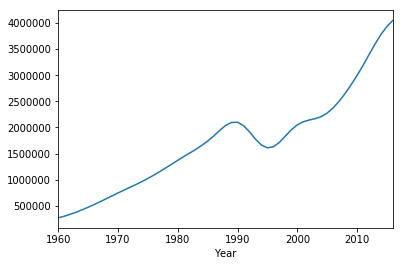

In [23]:
outputDF[outputDF.Country == 'Kuwait'].set_index('Year').Population.plot()
plt.show()

### Deals with the missing population values for Serbia <br>
 source of population data:<br>
 > http://data.un.org/

The last country containing null Population values is Serbia, because of the quantity of nulls present we downloaded the serbian population data from the UN's data website and loaded it into a dataframe and set its index as the year

In [24]:
serbDF = pd.read_csv('../../data/raw/serbiaPopulation.csv')
serbDF = serbDF[['Year','Population']].set_index('Year')
serbDF.head()

,Population
Year,
1989,9450770
1988,9397313
1987,9352150
1986,9306347
1985,9253405


We then found the indexs for every row for Serbia which contained null values for population

In [25]:
indexs = outputDF[outputDF.Country == 'Serbia'][outputDF[outputDF.Country == 'Serbia'].Population.isnull()].index

Using these indexs we filled in the rows population values using data from the serbDF dataframe

In [26]:
for i in indexs:
    outputDF.set_value(index=i,col='Population',value=serbDF.loc[outputDF.loc[i].Year].Population) 

Finally we ensured that all Population values were removed

In [27]:
outputDF.isnull().sum()

Country               0
Year                  0
Population            0
Males               779
Females             779
Life_Expectancy     950
GDP                2977
Region                0
dtype: int64

# Dealing with null Values in Females and Males

The next two fields with the lowest number of null values are 'Males' and 'Females' beacue these are linked they can be evalueated together

In [28]:
countries = outputDF[outputDF.Males.isnull()].Country.unique()
countries

array(['American Samoa', 'Andorra', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Dominica', 'Eritrea', 'Kosovo', 'Kuwait',
       'Liechtenstein', 'Monaco', 'Nauru', 'Palau', 'San Marino', 'Serbia',
       'St. Kitts and Nevis'], dtype=object)

All but 2 of these countries lack any values for male and female members of the population

### Eritrea and Kuwait<br>
For each of the years missing male and female numbers I found the average percentage of the population comprised of males and females over the three years leading up to the null value and used  rolleing mean to regressivly filling the null values

#### Eritrea

In [29]:
temp = outputDF[outputDF.Country == 'Eritrea']
indexs = temp[temp.Males.isnull()].index
year = outputDF.loc[indexs[0]].Year

for j in range(len(indexs)):
    perM = 0
    for i in range(-1,-4,-1):
        perM +=(temp[temp.Year == year+i].Males.item()/temp[temp.Year == year+i].Population.item())
    perM /=3
    outputDF.set_value(index=indexs[j],col='Males',value =(outputDF.loc[indexs[j]].Population*perM))
    outputDF.set_value(index=indexs[j],col='Females',value =(outputDF.loc[indexs[j]].Population*(1 - perM)))
outputDF[outputDF.Country == 'Eritrea'].tail()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region
3415,Eritrea,2012,4560977.0,2.282655e+06,2.278322e+06,63.212927,NaN,Sub-Saharan Africa
3416,Eritrea,2013,4650998.0,2.327708e+06,2.323290e+06,63.694902,NaN,Sub-Saharan Africa
3417,Eritrea,2014,4746045.0,2.375277e+06,2.370768e+06,64.163390,NaN,Sub-Saharan Africa
3418,Eritrea,2015,4846976.0,2.425791e+06,2.421185e+06,64.624390,NaN,Sub-Saharan Africa
3419,Eritrea,2016,4954645.0,2.479676e+06,2.474969e+06,NaN,NaN,Sub-Saharan Africa


#### Kuwait

In [30]:
temp = outputDF[outputDF.Country == 'Kuwait']
indexs = temp[temp.Males.isnull()].index
year = outputDF.loc[indexs[0]].Year

for j in range(len(indexs)):
    perM = 0
    for i in range(-1,-4,-1):
        perM +=(temp[temp.Year == year+i].Males.item()/temp[temp.Year == year+i].Population.item())
    perM /=3
    outputDF.set_value(index=indexs[j],col='Males',value =(outputDF.loc[indexs[j]].Population*perM))
    outputDF.set_value(index=indexs[j],col='Females',value =(outputDF.loc[indexs[j]].Population*(1 - perM)))
outputDF[outputDF.Country == 'Kuwait'].tail()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region
5581,Kuwait,2012,3395556.0,1955102.0,1440454.0,74.374415,1.349166e+11,West and Central Asia
5582,Kuwait,2013,3598385.0,2069644.0,1528741.0,74.498683,1.364669e+11,West and Central Asia
5583,Kuwait,2014,3782450.0,2173983.0,1608467.0,74.623488,1.371493e+11,West and Central Asia
5584,Kuwait,2015,3935794.0,2260983.0,1674811.0,74.746829,1.379637e+11,West and Central Asia
5585,Kuwait,2016,4052584.0,2327353.0,1725231.0,NaN,1.428573e+11,West and Central Asia


### Remaining Countries

The remaininging countires lacked any values for Males and feamles making it impossible to gauge the number of each gender within each country, To deal with this I found the average fraction of the population comprised of males and females for each region and used this to estimate

In [31]:
countries = outputDF[outputDF.Males.isnull()].Country.unique()
countries

array(['American Samoa', 'Andorra', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Dominica', 'Kosovo', 'Liechtenstein', 'Monaco',
       'Nauru', 'Palau', 'San Marino', 'Serbia', 'St. Kitts and Nevis'], dtype=object)

I created a dataframe with the fraction of males for every region for every year

In [32]:
aveRegion = outputDF.groupby(['Region','Year'])[['Males','Population']].sum()
aveRegion['FractionMale'] = aveRegion['Males']/aveRegion['Population']
aveRegion.head()

Males  Population  FractionMale
Region            Year                                      
Caribbean Islands 1960  14134527.0  28289976.0      0.499630
                  1961  14502851.0  29039777.0      0.499413
                  1962  14891877.0  29830616.0      0.499215
                  1963  15294632.0  30647062.0      0.499057
                  1964  15701132.0  31467400.0      0.498965

Using this dataframe i iterated through the list of countries with no values for Male or Females and estimated these values

In [33]:
for country in countries:
    region = outputDF[outputDF.Country == country].Region.unique()[0]
    indexs = outputDF[outputDF.Country == country].index
    regionAve = aveRegion.loc[region].FractionMale
    for i in indexs:
        year = outputDF.loc[i].Year
        pop = outputDF.loc[i].Population
        male = int(round(pop*regionAve[year]))
        female = pop-male
        outputDF.set_value(index=i,col='Males',value=male)
        outputDF.set_value(index=i,col='Females',value=female)
    print(country+" - Completed")

American Samoa - Completed
Andorra - Completed
Bermuda - Completed
British Virgin Islands - Completed
Cayman Islands - Completed
Dominica - Completed
Kosovo - Completed
Liechtenstein - Completed
Monaco - Completed
Nauru - Completed
Palau - Completed
San Marino - Completed
Serbia - Completed
St. Kitts and Nevis - Completed


I then ensured that all of the Male and Female values had been filled and that no null values remained

In [34]:
outputDF.isnull().sum()

Country               0
Year                  0
Population            0
Males                 0
Females               0
Life_Expectancy     950
GDP                2977
Region                0
dtype: int64

# Physical Geography

Takes in information pertaining to the physical geography of each of the countries<br>
<b>Source:</b> https://www.pdx.edu/econ/country-geography-data

The geography data is stored in a .csv file, i loaded this file into a dataframe

In [35]:
geoDF = pd.read_csv('../../data/raw/physicalGeographyCountries.csv', encoding = "ISO-8859-1")
geoDF.head()

,wbcode,country,areakm2,cen_lat,cen_lon,elev,distcr,distc,distr,tropicar,troppop,lc100km,lcr100km,pop95,pdenpavg,pop100km,pop100cr,cen_c,cen_cr
0,AFG,Afghanistan,646212.00,33.78231,66.16850,1884.7100,942.3510,942.467,2173.600,0.000000,0.000000,0.000000,0.000000,19800000.0,101.466,0.00,0.00,912.24200,911.6600
1,AGO,Angola,1235014.00,-12.35773,17.73944,1112.8050,481.4950,509.511,593.664,1.000000,1.000000,0.115201,0.138015,10300000.0,39.122,0.22,0.24,439.98800,440.6690
2,ALB,Albania,27899.96,41.14326,20.25988,911.4299,77.5443,76.038,387.121,0.000000,0.000000,0.858424,0.875449,3024697.0,138.108,0.80,0.80,88.38140,87.9127
3,ARE,United Arab Emirates,102580.30,23.53906,54.30128,148.9142,102.6250,101.119,2384.370,0.511730,0.209582,0.563218,0.568335,2149241.0,68.906,0.78,0.78,69.96239,67.6458
4,ARG,Argentina,2775401.00,-35.38706,-64.92097,595.6200,271.6420,388.408,832.692,0.027089,0.008644,0.110615,0.196890,31000000.0,47.908,0.20,0.32,478.94900,478.1270


Takes out necessary information from geography dataframe and adds it to output 

In [36]:
elevations = []
areas =[]
cenLat = []
cenLong = []

I then extracted the data I required from the dataframe and stored it in lists

In [37]:
def set_physicalGeography(row): 
    try:
        geoRow = geoDF[geoDF['country'] == row['Country']].iloc[0]
        elevations.append(geoRow['elev'])
        areas.append(geoRow['areakm2'])
        cenLat.append(geoRow['cen_lat'])
        cenLong.append(geoRow['cen_lon'])
    except:
        elevations.append(np.nan)
        areas.append(np.nan)
        cenLat.append(np.nan)
        cenLong.append(np.nan)

In [38]:
outputDF.apply(set_physicalGeography,axis = 1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
11313    None
11314    None
11315    None
11316    None
11317    None
11318    None
11319    None
11320    None
11321    None
11322    None
11323    None
11324    None
11325    None
11326    None
11327    None
11328    None
11329    None
11330    None
11331    None
11332    None
11333    None
11334    None
11335    None
11336    None
11337    None
11338    None
11339    None
11340    None
11341    None
11342    None
Length: 11343, dtype: object

I then added the geography data to the already existing dataframe

In [39]:
outputDF['Elevation'] = elevations
outputDF['Area_SqKM'] = areas
outputDF['Centroid_Longitude'] = cenLong
outputDF['Centroid_Latitude'] = cenLat
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231


After adding the data I checked which countires had no geography data present 

In [40]:
outputDF[outputDF.Elevation.isnull()].Country.unique()

array(['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba',
       'Bahamas, The', 'Bahrain', 'Barbados', 'Bermuda',
       'British Virgin Islands', 'Cabo Verde', 'Cayman Islands', 'Comoros',
       'Curacao', 'Dominica', 'Fiji', 'Grenada', 'Guam',
       'Hong Kong SAR, China', 'Korea, Dem. People’s Rep.', 'Kosovo',
       'Liechtenstein', 'Maldives', 'Malta', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Monaco', 'Nauru', 'Palau', 'Samoa',
       'San Marino', 'Sao Tome and Principe', 'Seychelles', 'Singapore',
       'Solomon Islands', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Timor-Leste', 'Tonga', 'Vanuatu',
       'Virgin Islands (U.S.)'], dtype=object)

Finally, using the area and population data I found the population density for each country for each year

In [41]:
popDensity = []
def popPerSqKM(row):
    popDensity.append(row['Population']/row['Area_SqKM'])

In [42]:
outputDF.apply(popPerSqKM,axis = 1)
outputDF['Population_Density'] = popDensity

# Greenhouse Gasses

Obtains information on air quality and emmisions from the worldbank .csv files

In [43]:
countryDict = dict()

Using provided rows stores data for each country for each year in the countryDict dictionary

In [44]:
def getGasses(rowNO,rowCO,rowME):
    gasDict = dict()
    for year in Years:
            gasDict[year] = [rowNO[str(year)],rowCO[str(year)],rowME[str(year)]]
    countryDict[rowNO["Country Name"]] = gasDict

Loop passes the correct indicator codes to the .csvs for every country

In [45]:
for df in dfs:
    rowNO = df[df['Indicator Code'] == 'EN.ATM.NOXE.KT.CE'].iloc[0]
    rowME = df[df['Indicator Code'] == 'EN.ATM.METH.KT.CE'].iloc[0]
    rowCO = df[df['Indicator Code'] == 'EN.ATM.CO2E.KT'].iloc[0]
    getGasses(rowNO,rowCO,rowME)

Prints the resulting countryDict

In [46]:
countryDict

{'Afghanistan': {1960: [nan, 414.37099999999998, nan],
  1961: [nan, 491.37800000000004, nan],
  1962: [nan, 689.39600000000007, nan],
  1963: [nan, 707.73100000000011, nan],
  1964: [nan, 839.74300000000005, nan],
  1965: [nan, 1008.425, nan],
  1966: [nan, 1092.7660000000001, nan],
  1967: [nan, 1283.45, nan],
  1968: [nan, 1224.778, nan],
  1969: [nan, 942.41899999999998, nan],
  1970: [3042.2563, 1672.152, 10202.0],
  1971: [3006.1381999999999, 1895.8389999999999, 10201.5],
  1972: [2530.1579999999999, 1532.806, 9170.5900000000001],
  1973: [2674.4041000000002, 1639.1489999999999, 9403.5400000000009],
  1974: [2937.3182000000002, 1917.8410000000001, 9987.9300000000003],
  1975: [3153.723, 2126.8600000000001, 10476.6],
  1976: [3265.6329999999998, 1987.5139999999999, 10535.6],
  1977: [3268.9809999999998, 2390.884, 10455.9],
  1978: [3272.9179999999997, 2159.8629999999998, 10380.1],
  1979: [3214.5450000000001, 2240.5370000000003, 10176.200000000001],
  1980: [3275.0259999999998, 17

Loop goes through every entry in the countrydcit appending it all to lists

In [47]:
tot = []
no =[]
co = []
me = []

for key in countryDict:
    for i in countryDict[key]:
        no.append(countryDict[key][i][0])
        if countryDict[key][i][1] == 0.0:
                  co.append(np.nan)
        else: co.append(countryDict[key][i][1])
        me.append(countryDict[key][i][2])
        if np.isnan(countryDict[key][i][1]):
            countryDict[key][i][1] = np.nan_to_num(countryDict[key][i][1])
        if np.isnan(countryDict[key][i][0]):
            countryDict[key][i][0] = np.nan_to_num(countryDict[key][i][0])
        if np.isnan(countryDict[key][i][2]):
            countryDict[key][i][2] = np.nan_to_num(countryDict[key][i][2])
        total = countryDict[key][i][0] + countryDict[key][i][1] + countryDict[key][i][2]
        tot.append(total)

Adds new gas data to datafame

In [48]:
outputDF['CO2_Emissions'] = co
outputDF['Methane_Emissions'] = me
outputDF['Nitrous_Oxide_Emisions'] = no
outputDF['Total_Emissions'] = tot
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Population_Density,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,13.921671,414.371,NaN,NaN,414.371
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.185382,491.378,NaN,NaN,491.378
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.462542,689.396,NaN,NaN,689.396
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.753601,707.731,NaN,NaN,707.731
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,15.059084,839.743,NaN,NaN,839.743


Evaluates the amount of emmisions generated per capita

In [49]:
outputDF['Emmisions_per_Capita'] = outputDF['Total_Emissions']/temp['Population']
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Population_Density,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,13.921671,414.371,NaN,NaN,414.371,NaN
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.185382,491.378,NaN,NaN,491.378,NaN
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.462542,689.396,NaN,NaN,689.396,NaN
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.753601,707.731,NaN,NaN,707.731,NaN
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,15.059084,839.743,NaN,NaN,839.743,NaN


Checks the number of null values still present in the dataset

In [50]:
outputDF.isnull().sum()

Country                       0
Year                          0
Population                    0
Males                         0
Females                       0
Life_Expectancy             950
GDP                        2977
Region                        0
Elevation                  2337
Area_SqKM                  2337
Centroid_Longitude         2337
Centroid_Latitude          2337
Population_Density         2337
CO2_Emissions              2024
Methane_Emissions          3123
Nitrous_Oxide_Emisions     3080
Total_Emissions               0
Emmisions_per_Capita      11286
dtype: int64

Prints the first five rows of the dataset

In [51]:
outputDF.head()

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Population_Density,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,13.921671,414.371,NaN,NaN,414.371,NaN
1,Afghanistan,1961,9166764.0,4729085.0,4437679.0,32.786976,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.185382,491.378,NaN,NaN,491.378,NaN
2,Afghanistan,1962,9345868.0,4813500.0,4532368.0,33.228927,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.462542,689.396,NaN,NaN,689.396,NaN
3,Afghanistan,1963,9533954.0,4902742.0,4631212.0,33.666902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,14.753601,707.731,NaN,NaN,707.731,NaN
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,15.059084,839.743,NaN,NaN,839.743,NaN


# Filtering out non relevant years

Years that don't relate to Olympic games are not relevant to the scope of this study and are removed from the dataframe

In [52]:
OlympicYears = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
                2004, 2008, 2012, 1994, 1998, 2002, 2006, 2010, 2014,2016]
OlympicYears

[1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 1994,
 1998,
 2002,
 2006,
 2010,
 2014,
 2016]

The relevant years are kept

In [53]:
final_DF = outputDF[outputDF.Year.isin(OlympicYears)]
final_DF.head() 

,Country,Year,Population,Males,Females,Life_Expectancy,GDP,Region,Elevation,Area_SqKM,Centroid_Longitude,Centroid_Latitude,Population_Density,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita
0,Afghanistan,1960,8996351.0,4649361.0,4346990.0,32.337561,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,13.921671,414.371,NaN,NaN,414.371,NaN
4,Afghanistan,1964,9731361.0,4996990.0,4734371.0,34.101902,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,15.059084,839.743,NaN,NaN,839.743,NaN
8,Afghanistan,1968,10604346.0,5419182.0,5185164.0,35.832415,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,16.410011,1224.778,NaN,NaN,1224.778,NaN
12,Afghanistan,1972,11721940.0,5967987.0,5753953.0,37.620171,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,18.139465,1532.806,9170.59,2530.158,13233.554,NaN
16,Afghanistan,1976,12840299.0,6524577.0,6315722.0,39.585390,NaN,West and Central Asia,1884.71,646212.0,66.1685,33.78231,19.870103,1987.514,10535.60,3265.633,15788.747,NaN


We ensure that the remaining years in the dataframe fall between 1960 and 2016

In [54]:
final_DF.Year.unique()

array([1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype=int64)

We then check the number of null values that still exist within the dataframe

In [55]:
final_DF.isnull().sum()

Country                      0
Year                         0
Population                   0
Males                        0
Females                      0
Life_Expectancy            455
GDP                        892
Region                       0
Elevation                  861
Area_SqKM                  861
Centroid_Longitude         861
Centroid_Latitude          861
Population_Density         861
CO2_Emissions              675
Methane_Emissions         1118
Nitrous_Oxide_Emisions    1102
Total_Emissions              0
Emmisions_per_Capita      4158
dtype: int64

#### The Output

In [56]:
final_DF.to_csv('../../data/prep/Countries/countries_200.csv', index=False)